 ## Domain:
 - E-commerce
 ## Business Context:
- Customer segmentation is one of the most important marketing tools at your disposal, because it can help a business to better understand its target audience. This is because it groups customers based on common characteristics.
- Segmentation can be based on the customer’s habits and lifestyle, in particular, their buying habits. Different age groups, for example, tend to
 spend their money in different ways, so brands need to be aware of who exactly is buying their product.
- Segmentation also focuses more on the personality of the consumer, including their opinions, interests, reviews, and rating. Breaking down a large customer base into more manageable clusters, making it easier to identify your target audience and launch campaigns and promote the business to the most relevant people



## Dataset Description:
The dataset contains measurements of clothing fit from RentTheRunway. RentTheRunWay is a unique platform that allows women to rent clothes for various occasions. The collected data is of several categories. This dataset contains self-reported fit feedback from customers as well as other side information like reviews, ratings, product categories, catalog sizes, customers, measurements (etc.)

## Attribute Information:
 1. user_id -  a unique id for the customer
 2. item_id -  unique product id
 3. weight -  weight measurement of customer
 4. rented for -  purpose clothing was rented for 
 5. body type -  body type of customer
 6. review_text -  review given by the customer
 7. size - the standardized size of the product
 8. rating - rating for the product
 9. age - age of the customer
 10. category - the category of the product
 11. bust size - bust measurement of customer
 12. height - height of the customer
 13. review_date - date when the review was written
 14. fit - fit feedback
 


## Import the required libraries and load the data)

### 1. Load the required libraries and read the dataset. (1 point) 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,AgglomerativeClustering

from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage

In [7]:
df = pd.read_csv('renttherunway.csv')

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features (2 point)

In [9]:
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [11]:
df.shape

(192544, 16)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192476 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192197 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

- There is approx 192k datasets with 16 column.
- Most of the columns are object.
- There is some missing values also.

## Data cleansing and Exploratory data analysis

### 3. Check if there are any duplicate records in the dataset? If any, drop them. (1)

In [15]:
df.duplicated().sum()

0

- There is no duplicate records in dataset.

### 4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’) (1)

In [17]:
df.drop(columns=['Unnamed: 0', 'user_id', 'review_text', 'review_summary', 'review_date'], inplace = True, axis = 1) 

In [19]:
df.head()

,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,2260466,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,153475,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,1063761,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,126335,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,616682,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0


### 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs) (2)

In [21]:
df['weight']

0         137lbs
1         132lbs
2            NaN
3         135lbs
4         145lbs
           ...  
192539    140lbs
192540    100lbs
192541    135lbs
192542    165lbs
192543    155lbs
Name: weight, Length: 192544, dtype: object

In [23]:
df['weight'] = df['weight'].str.replace('lbs', '').astype('float')

In [25]:
df['weight']

0         137.0
1         132.0
2           NaN
3         135.0
4         145.0
          ...  
192539    140.0
192540    100.0
192541    135.0
192542    165.0
192543    155.0
Name: weight, Length: 192544, dtype: float64

### 6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'. (2)

In [27]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [29]:
df['rented for'].value_counts()

rented for
wedding            57784
formal affair      40408
party              35626
everyday           16822
other              15388
work               15042
date                7388
vacation            4075
party: cocktail        1
Name: count, dtype: int64

In [31]:
df['rented for'] = df['rented for'].replace('party: cocktail', 'party') 

In [33]:
df['rented for'].value_counts()

rented for
wedding          57784
formal affair    40408
party            35627
everyday         16822
other            15388
work             15042
date              7388
vacation          4075
Name: count, dtype: int64

### 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype. (3)

In [35]:
df['height']

0         5' 8"
1         5' 6"
2         5' 4"
3         5' 5"
4         5' 9"
          ...  
192539    5' 9"
192540    5' 1"
192541    5' 8"
192542    5' 6"
192543    5' 6"
Name: height, Length: 192544, dtype: object

In [37]:
def convert_to_inches(height_feet):
    if pd.isnull(height_feet):
        return None
    feet, inches = height_feet.split("'")
    feet = int(feet.strip())
    inches = int(inches.strip().replace('"', ''))
    return feet * 12 + inches
  
df['height'] = df['height'].apply(convert_to_inches).astype(float)

In [39]:
df['height']

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

In [41]:
def basic_stastical_info(col):
    print("standard Deviation:", col.std())
    print("mean:", col.mean())
    print("median:", col.median())
    print("mode:", col.mode()[0])
    print("skewness:", col.skew())

### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods. (3)

In [43]:
df.isnull().sum()

fit               0
bust size     18411
item_id           0
weight        29982
rating           82
rented for       10
body type     14637
category          0
height          677
size              0
age             960
dtype: int64

In [45]:
df.isnull().sum()/len(df)*100

fit            0.000000
bust size      9.561970
item_id        0.000000
weight        15.571506
rating         0.042588
rented for     0.005194
body type      7.601899
category       0.000000
height         0.351608
size           0.000000
age            0.498587
dtype: float64

In [47]:
obj_col_with_missing_val = ['bust size', 'rented for', 'body type']
for col in obj_col_with_missing_val:
    df[col].fillna(df[col].mode()[0], inplace = True)

- Imputing categorical missing values with their mode value.

In [49]:
num_col_with_missing_val = ['weight', 'rating',  'age', 'height']
for col in num_col_with_missing_val:
    print(col, ":")
    basic_stastical_info(df[col])
    print("\n")

weight :
standard Deviation: 21.899966986081854
mean: 137.39170900948562
median: 135.0
mode: 130.0
skewness: 1.3957425823730227


rating :
standard Deviation: 1.430044183927019
mean: 9.092371481123546
median: 10.0
mode: 10.0
skewness: -1.8380759306002734


age :
standard Deviation: 8.058082978614882
mean: 33.871017412727575
median: 32.0
mode: 31.0
skewness: 1.501704857929823


height :
standard Deviation: 2.663480059738929
mean: 65.31062142004617
median: 65.0
mode: 64.0
skewness: 0.13831669707210456




In [51]:
for col in num_col_with_missing_val:
    df[col].fillna(df[col].median(), inplace = True)

- Since the data is skewed, the median is a robust measure of central tendency and is less affected by extreme values.

In [53]:
df.isnull().sum()

fit           0
bust size     0
item_id       0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64

### 9. Check the statistical summary for the numerical and categorical columns and write your findings. (3)

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_id,192544.0,1.045684e+06,805314.802324,123373.0,195076.0,948396.0,1678888.0,2966087.0
weight,192544.0,1.370193e+02,20.141448,50.0,125.0,135.0,145.0,300.0
rating,192544.0,9.092758e+00,1.429862,2.0,8.0,10.0,10.0,10.0
height,192544.0,6.530953e+01,2.658857,54.0,63.0,65.0,67.0,78.0
size,192544.0,1.224518e+01,8.494877,0.0,8.0,12.0,16.0,58.0
age,192544.0,3.386169e+01,8.039050,0.0,29.0,32.0,37.0,117.0


- Age column has min value 0 and max 117. It has potential outliers also we have to check that zero is a missing value or real value.
- size has also some zeros.

In [57]:
df.describe(include = 'O')

,fit,bust size,rented for,body type,category
count,192544,192544,192544,192544,192544
unique,3,106,8,7,68
top,fit,34b,wedding,hourglass,dress
freq,142058,45696,57794,69986,92884


- Bust size and category column has lots of unique values.

In [59]:
df[df['age'] == 0]

,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age
2029,fit,34b,1746190,125.0,10.0,other,straight & narrow,dress,67.0,4,0.0
11515,fit,34b,1451390,125.0,10.0,wedding,straight & narrow,maxi,67.0,4,0.0
14814,fit,36b,1110676,125.0,8.0,party,petite,maxi,65.0,7,0.0
15112,fit,34a,1009409,130.0,10.0,wedding,hourglass,dress,68.0,14,0.0
27691,large,34a,2297075,130.0,10.0,everyday,hourglass,coat,68.0,8,0.0
35725,fit,34b,163328,125.0,10.0,formal affair,straight & narrow,gown,67.0,5,0.0
38203,fit,34c,632507,170.0,10.0,wedding,athletic,sheath,70.0,20,0.0
40065,small,34b,422368,135.0,4.0,party,hourglass,dress,66.0,35,0.0
46224,fit,34a,2797877,130.0,8.0,date,hourglass,top,68.0,8,0.0
55943,fit,34a,1371685,130.0,10.0,formal affair,hourglass,dress,68.0,12,0.0


- People with age zero having weight around 120lbs (54 kg) which is impossible. so these are the missing values. 

In [61]:
median_age = df['age'].median()
df.loc[df['age'] == 0, 'age'] = median_age

In [63]:
df[df['age'] == 0]

,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age


### 10. Are there outliers present in the column age? If yes, treat them with the appropriate method. (3)


In [65]:
# Calculate IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 10230


#### Percentage of outliers in age

In [67]:
len(outliers)/len(df['age']) *100

5.3130712979890315

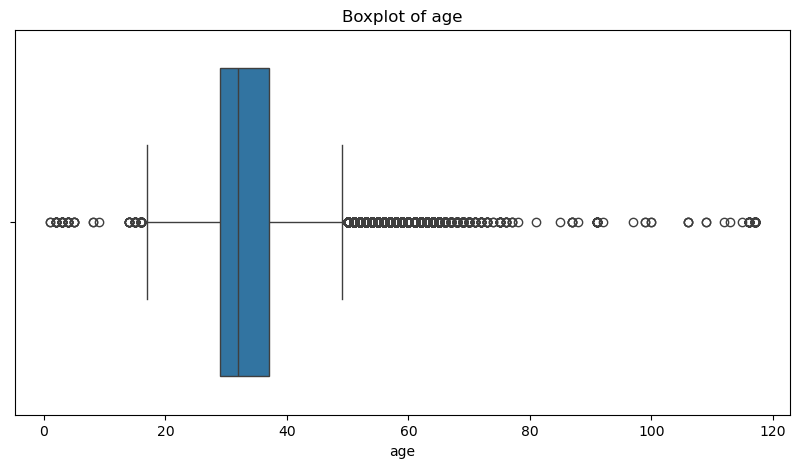

In [69]:
plt.figure(figsize=[10, 5])
sns.boxplot(x = 'age', data = df)
plt.title("Boxplot of age")
plt.show()

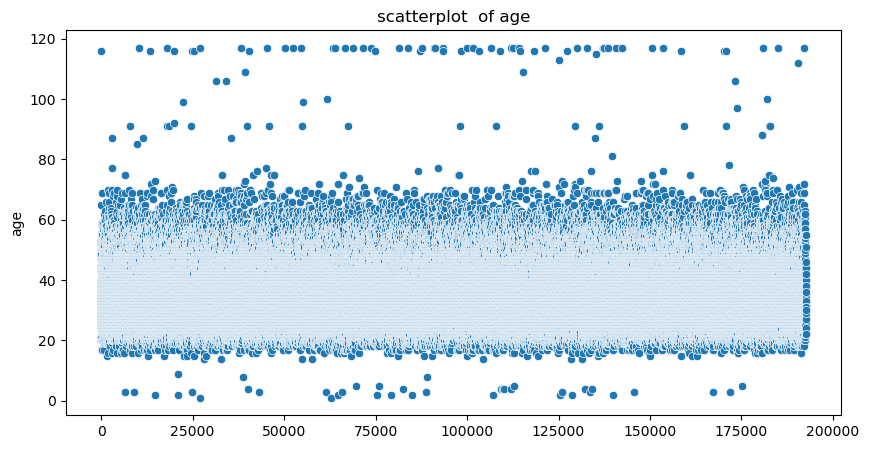

In [71]:
plt.figure(figsize=[10, 5])
sns.scatterplot(df['age'])
plt.title("scatterplot  of age")
plt.show()

- Yes, age has outliers, around 10k instances.

In [73]:
basic_stastical_info(df['age'])

standard Deviation: 8.030181448041677
mean: 33.86567745554263
median: 32.0
mode: 31.0
skewness: 1.5211312776870363


In [75]:
# Capping the outliers
df['age'] = df['age'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

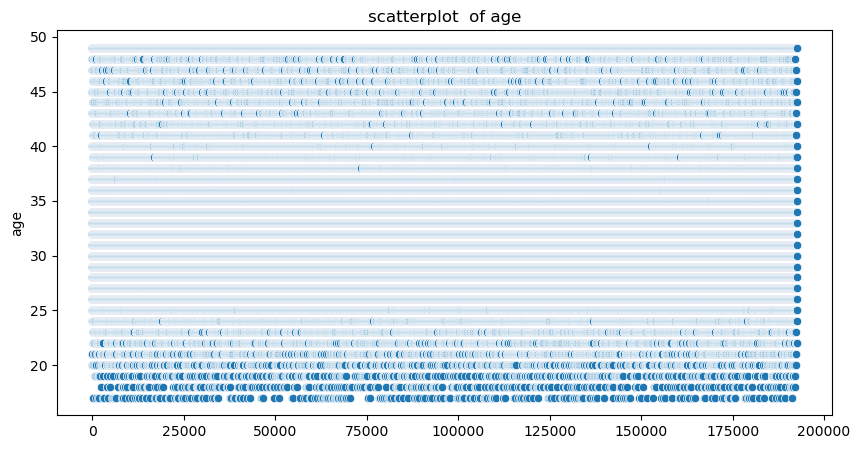

In [77]:
plt.figure(figsize=[10, 5])
sns.scatterplot(df['age'])
plt.title("scatterplot  of age")
plt.show()

In [79]:
cleaned_df = df.copy()

### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot. (2)

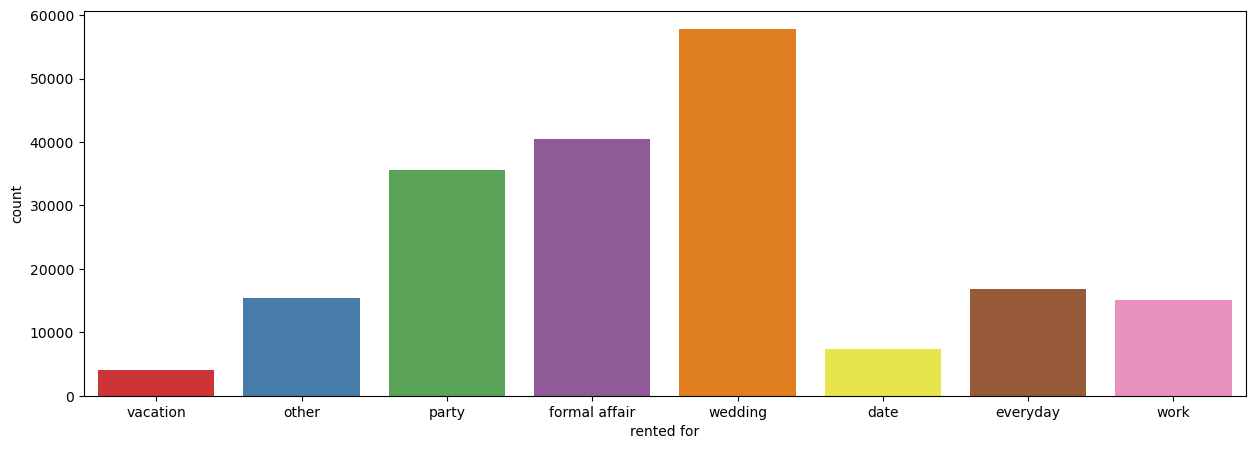

In [81]:
plt.figure(figsize =(15, 5))
sns.countplot(x= 'rented for', hue='rented for', data = df, palette= 'Set1')
plt.show()

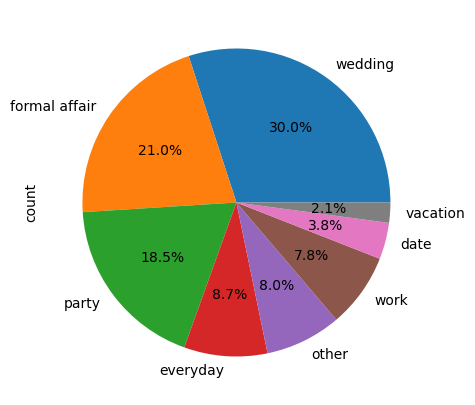

In [83]:
plt.figure(figsize =(5, 5))
df['rented for'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

- Most of the people rented clothes for wedding and than formal affair, party

## Data Preparation for model building)

### 12. Encode the categorical variables in the dataset. (1) 

In [85]:
cat_df = df.select_dtypes('O')
cat_df.head()

,fit,bust size,rented for,body type,category
0,fit,34d,vacation,hourglass,romper
1,fit,34b,other,straight & narrow,gown
2,fit,34b,party,hourglass,sheath
3,fit,34c,formal affair,pear,dress
4,fit,34b,wedding,athletic,gown


In [87]:
df.describe(include='O')

,fit,bust size,rented for,body type,category
count,192544,192544,192544,192544,192544
unique,3,106,8,7,68
top,fit,34b,wedding,hourglass,dress
freq,142058,45696,57794,69986,92884


In [89]:
col_high_unique_value = ['bust size']
lbl_encoder = LabelEncoder()
for col in col_high_unique_value:
    df[col] = lbl_encoder.fit_transform(sorted(df[col]))

In [91]:
col_low_unique_value = ['fit', 'rented for','body type','category']
for col in col_low_unique_value:
    df = pd.get_dummies(df, columns=[col], prefix=col, dtype=int)

In [93]:
df.head()

,bust size,item_id,weight,rating,height,size,age,fit_fit,fit_large,fit_small,...,category_tank,category_tee,category_tight,category_top,category_trench,category_trouser,category_trousers,category_tunic,category_turtleneck,category_vest
0,0,2260466,137.0,10.0,68.0,14,28.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,153475,132.0,10.0,66.0,12,36.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1063761,135.0,10.0,64.0,4,49.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,126335,135.0,8.0,65.0,8,34.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,616682,145.0,10.0,69.0,12,27.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
encoded_df = df.copy()

### 13. Standardize the data, so that the values are within a particular range. (1)

In [97]:
df_std = df.apply(zscore)

In [99]:
df_std.head(2)

,bust size,item_id,weight,rating,height,size,age,fit_fit,fit_large,fit_small,...,category_tank,category_tee,category_tight,category_top,category_trench,category_trouser,category_trousers,category_tunic,category_turtleneck,category_vest
0,-3.564764,1.508460,-0.000957,0.634498,1.011893,0.206575,-0.792599,0.596146,-0.383677,-0.39317,...,-0.030675,-0.01069,-0.008827,-0.16212,-0.010192,-0.016904,-0.009669,-0.029019,-0.01329,-0.038025
1,-3.564764,-1.107903,-0.249202,0.634498,0.259688,-0.028862,0.358189,0.596146,-0.383677,-0.39317,...,-0.030675,-0.01069,-0.008827,-0.16212,-0.010192,-0.016904,-0.009669,-0.029019,-0.01329,-0.038025


## Principal Component Analysis and Clustering

### 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same. (7) 

In [101]:
cov_matrix = np.cov(df_std.T)
cov_matrix

array([[ 1.00000519e+00, -2.27566099e-03, -6.83605771e-04, ...,
         6.01179418e-04, -2.59501341e-03, -2.01410898e-04],
       [-2.27566099e-03,  1.00000519e+00, -3.08500948e-02, ...,
         5.35566601e-02,  1.88952503e-02,  7.16069869e-02],
       [-6.83605771e-04, -3.08500948e-02,  1.00000519e+00, ...,
        -2.76698288e-03,  4.14218476e-04, -2.83433276e-03],
       ...,
       [ 6.01179418e-04,  5.35566601e-02, -2.76698288e-03, ...,
         1.00000519e+00, -3.85647355e-04, -1.10343993e-03],
       [-2.59501341e-03,  1.88952503e-02,  4.14218476e-04, ...,
        -3.85647355e-04,  1.00000519e+00, -5.05342960e-04],
       [-2.01410898e-04,  7.16069869e-02, -2.83433276e-03, ...,
        -1.10343993e-03, -5.05342960e-04,  1.00000519e+00]])

In [103]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eigen values:','\n',eig_vals)
print('\n')
print('eigen vectors','\n',eig_vectors)

eigen values: 
 [ 2.44562117e+00  2.31294303e+00  2.00393860e+00  1.85020144e+00
  2.50980841e-01  2.93125424e-01  4.89171256e-01  5.55595753e-01
  1.47221520e+00  1.40022256e+00  6.78855312e-01  1.36454331e+00
  1.34096662e+00  7.19810293e-01  3.63433616e-13 -1.19962757e-12
 -8.87062872e-13 -9.17567385e-13  1.25074589e+00  8.45519385e-01
  1.19025934e+00  8.66515776e-01  1.16269500e+00  1.14289326e+00
  1.12726205e+00  9.03853907e-01  1.09663188e+00  1.08125484e+00
  1.07763438e+00  1.05538439e+00  9.48381807e-01  1.04611866e+00
  9.71489767e-01  9.79642209e-01  1.02033796e+00  9.85677228e-01
  1.01601161e+00  1.01328524e+00  1.01018211e+00  9.92362732e-01
  9.93282283e-01  1.00840490e+00  1.00682935e+00  1.00574606e+00
  1.00465157e+00  9.96894278e-01  1.00368283e+00  1.00289131e+00
  9.98062909e-01  1.00259285e+00  1.00211892e+00  1.00177105e+00
  9.98912653e-01  1.00162202e+00  9.98980405e-01  1.00136374e+00
  1.00120691e+00  1.00116359e+00  9.99410682e-01  9.99474463e-01
  1.00098

In [105]:
# Making a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eig_vals[index], eig_vectors[:,index]) for index in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eig_vals))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(2.445621166283804, array([ 0.0014225 , -0.34689036,  0.37250255,  0.07588557,  0.22199981,
        0.36817144,  0.00881335,  0.11748885, -0.132641  , -0.02147975,
       -0.06453898, -0.26050656,  0.28250874, -0.04412802, -0.07264501,
       -0.05299197,  0.11769375, -0.13125016,  0.07084214, -0.02365672,
        0.07609054,  0.13423409,  0.04948405, -0.25275677, -0.080318  ,
        0.010546  , -0.05485621, -0.05486365, -0.00432297, -0.02956613,
       -0.00359808, -0.0051719 , -0.00817737, -0.02145056, -0.03771117,
       -0.07804797, -0.00535569, -0.00176948, -0.02008488, -0.02896246,
       -0.05047421, -0.06100117, -0.01110556, -0.00514363, -0.00273875,
        0.33253781, -0.00718083, -0.01439075, -0.11212143, -0.00609541,
       -0.00720578, -0.10362946, -0.01004114, -0.01528379, -0.01563926,
       -0.01637943, -0.02000533,  0.00474714,  0.00396155, -0.01782069,
       -0.00386839, -0.0018198 , -0.02213501, -0.04605997, -0.01383765,
       -0.01805595, -0.01697506, -0.0016486

In [107]:
total = sum(eig_vals)

# an array of variance explained by each eigen vector
var_explained = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]

# an array of cumulative variance.
cum_var_exp = np.cumsum(var_explained)

print('Explained Variance: ',var_explained)
print('Cummulative Variance Explained: ',cum_var_exp)

Explained Variance:  [2.6296865211414766, 2.4870226031903906, 2.1547614976080443, 1.989453582246962, 1.583018873178876, 1.5056078339921424, 1.4672432488748377, 1.4418921067090311, 1.3448810655389336, 1.279842108988447, 1.2502031869491, 1.228911105850124, 1.2121034386332112, 1.1791679364496224, 1.1626335711469067, 1.1587406266636453, 1.1348160264485152, 1.1248529373999916, 1.097131889453457, 1.0924799303537664, 1.089548358522365, 1.0862116857885353, 1.0843007083819298, 1.0826065843964698, 1.0814417581707136, 1.0802648945689692, 1.0792232398291837, 1.0783721518563323, 1.078051226573228, 1.0775416272908145, 1.077167577936086, 1.0770073333378691, 1.076729609975199, 1.07656097650611, 1.0765143950561136, 1.0763179678781618, 1.0761973526925563, 1.0760667458104405, 1.0759586967909873, 1.0759093888804405, 1.0758627646792422, 1.0758229608727123, 1.0757764600207331, 1.0757412988347073, 1.075710670059773, 1.0756433827944551, 1.0756036172871914, 1.0755735524065673, 1.07550812039745, 1.0754789436581

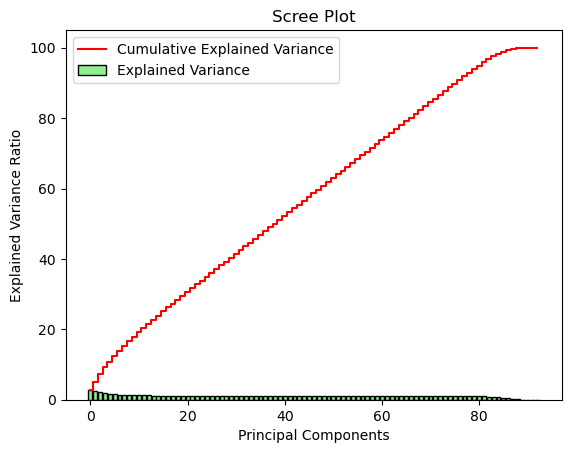

In [109]:
# Scree plot
plt.bar(range(len(var_explained)), var_explained, align='center', color='lightgreen', edgecolor='black', label='Explained Variance')
plt.step(range(len(var_explained)), cum_var_exp, where='mid', color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

In [111]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(df_std)

# Check the number of components selected
print(f"Number of components selected: {pca.n_components_}")

Number of components selected: 82


- We can observe from the above scree plot and PCA around 80 principal components are explaining about 90-95% of the variation, So we can choose optimal number of principal components as 80.

In [114]:
pca = PCA(n_components= 80)
pca_df = pca.fit_transform(df_std)
pca_df = pd.DataFrame(pca_df, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80
0,-1.111925,1.343413,2.250971,-0.650375,0.492619,-1.581660,1.356277,1.812333,2.778940,0.415814,...,0.026209,-0.097469,0.213704,0.027311,-0.167827,-0.190212,-3.085566,-0.693902,0.991418,-2.104108
1,0.764750,-1.443021,0.967110,0.226308,-0.904710,-0.079976,-0.918905,1.091248,0.187039,2.397697,...,-0.055322,-0.257093,0.485905,-0.495985,-0.141530,0.668758,-2.527602,0.153287,0.395098,-0.189625
2,-0.197162,-0.021869,0.627557,-1.190937,1.201530,-2.236061,1.450056,0.663431,-0.032936,-0.447107,...,-0.082207,-0.040588,0.159755,-0.029909,-0.716121,1.460189,-1.949471,-0.849900,0.758650,-0.345687
3,0.868412,-0.885667,-0.301498,-0.072812,-0.143140,-0.107649,-1.947704,-0.945796,0.345376,1.278245,...,-0.078319,-0.039668,-0.072351,-0.275706,-0.694087,0.799575,-2.119234,-0.818208,0.905884,-0.167358
4,1.709815,-1.092408,0.855864,0.122611,-2.280850,1.099017,1.014170,0.092833,-0.023338,-0.875196,...,0.184041,-0.099581,0.120436,-0.057407,-0.574857,0.527615,-2.423534,-0.211725,0.171208,0.063751


### 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) (8) 
- a. Find the optimal K Value using elbow plot for K Means clustering.
- b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.
- c. Compute silhouette score for evaluating the quality of the K Means clustering technique.

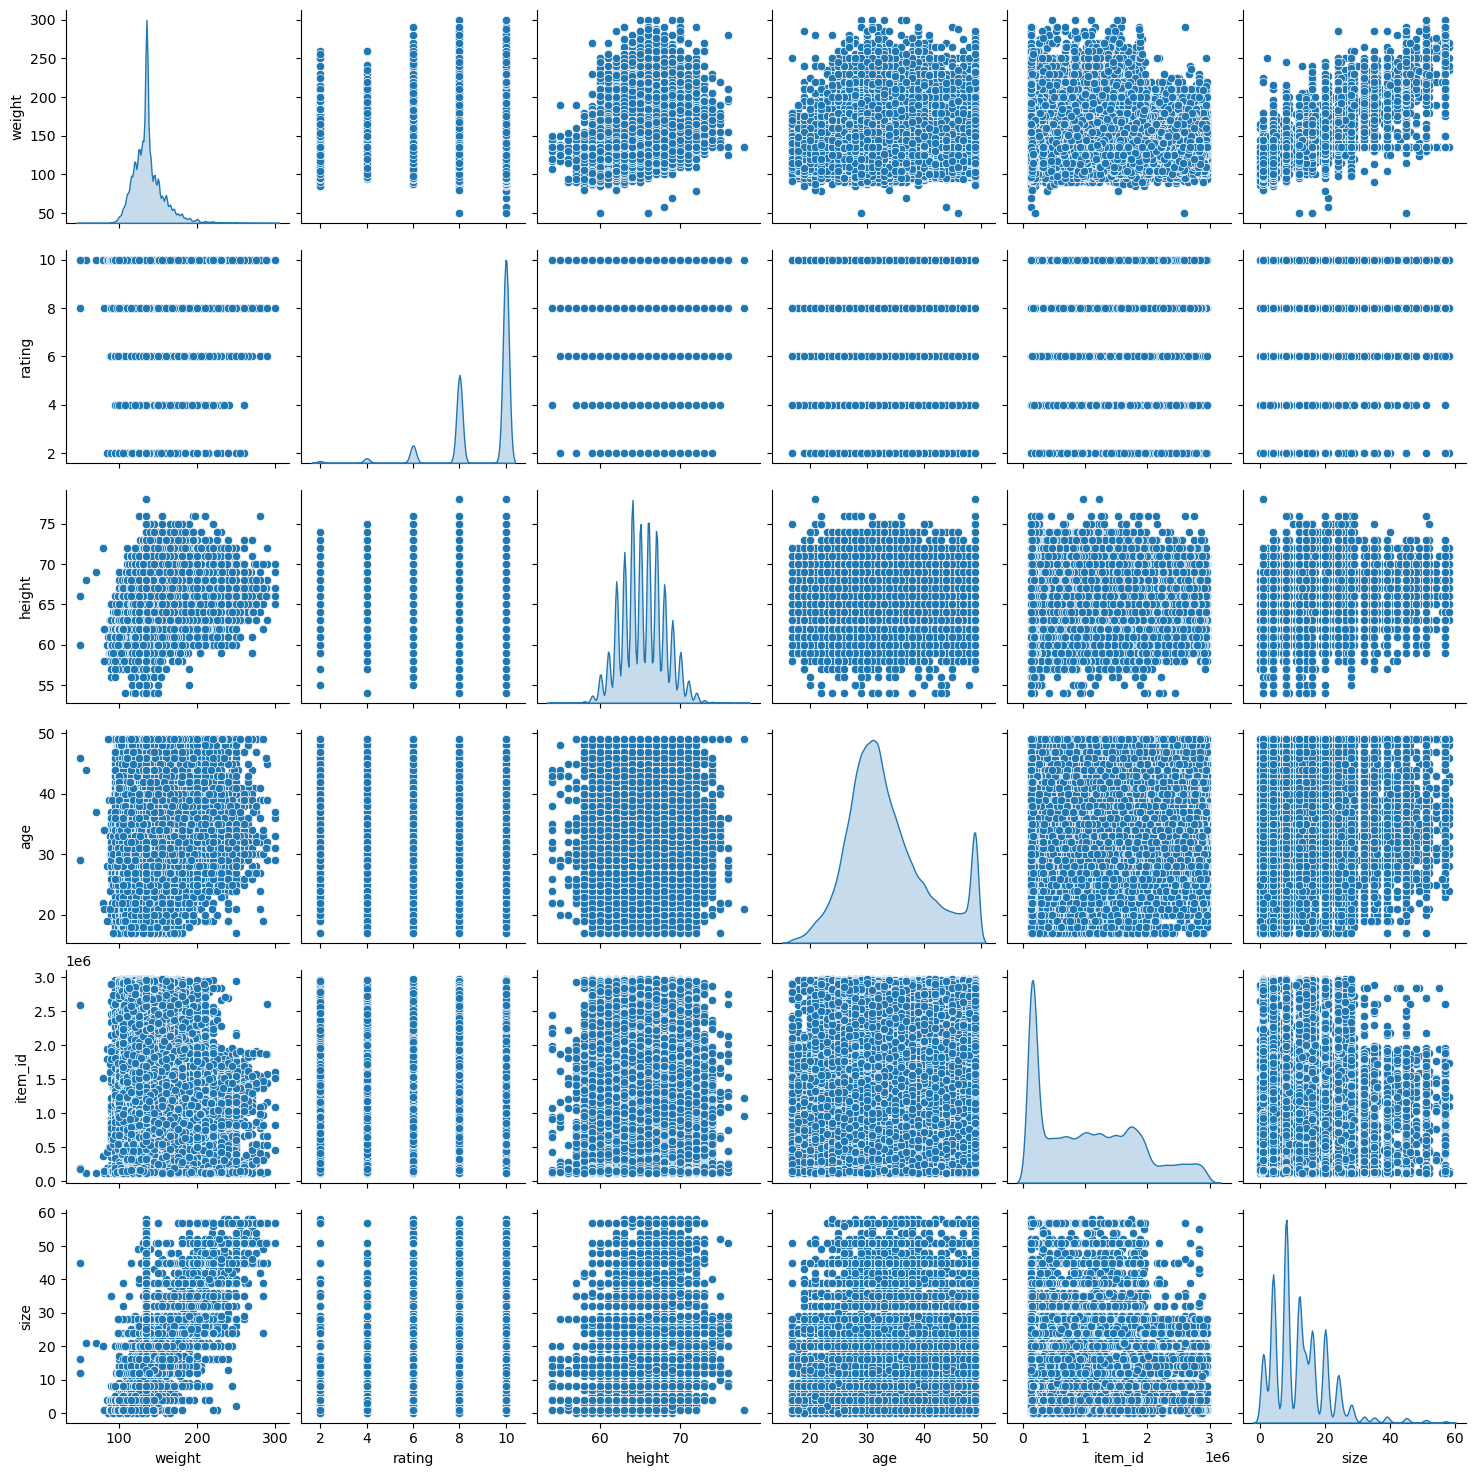

In [117]:
float_num_col = cleaned_df.select_dtypes('float')
int_num_col = cleaned_df.select_dtypes('int')
num_col = float_num_col.join(int_num_col)
sns.pairplot(num_col, diag_kind='kde')
plt.show()

- Since datatset is too huge it is consuming more time to compute. so i am taking sample of 10000 data randomly to compute elbow plot and silhouette score.

In [120]:
pca_df_subsample = pca_df.sample(n=10000, random_state=42)

  File "C:\Users\shubh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 227, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\shubh\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shubh\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\shubh\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


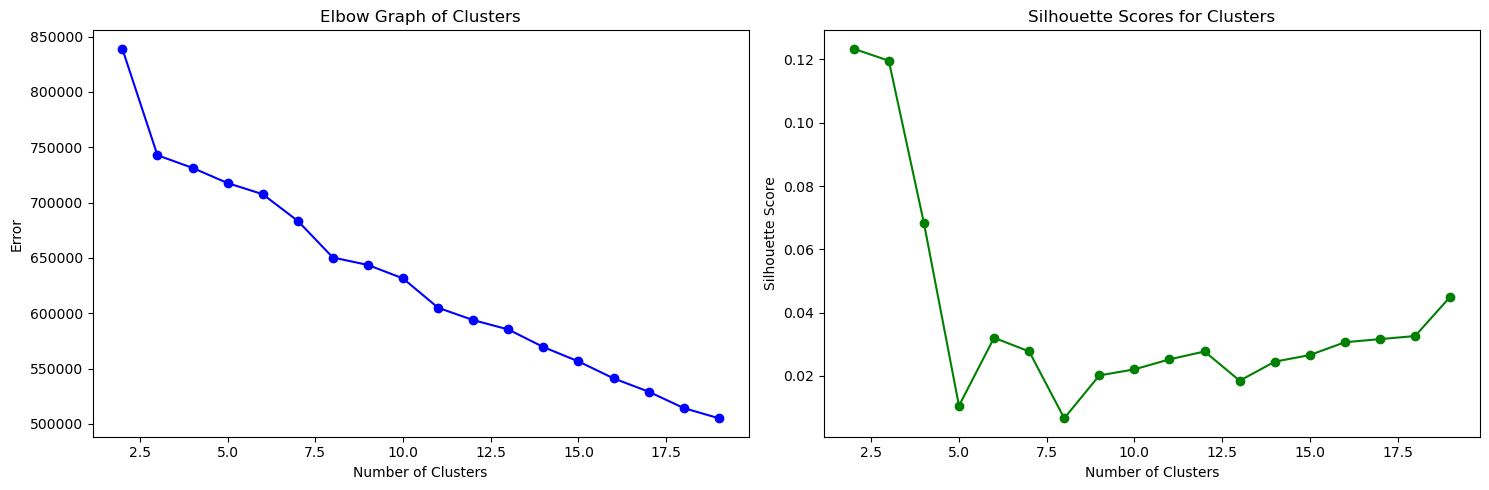

In [122]:
clusters_errors = []
silhouette_scores = []
clusters_range = range(2, 20)

for K in clusters_range:
    clusters = KMeans(K, random_state=42)
    clusters.fit(pca_df_subsample)
    clusters_errors.append(clusters.inertia_)
    silhouette_scores.append(silhouette_score(pca_df_subsample, clusters.labels_))

# Create DataFrames for visualization
cluster_df = pd.DataFrame({'num_clusters': clusters_range, 'cluster_errors': clusters_errors, 'silhouette_score': silhouette_scores})

# Elbow Plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Elbow Graph of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.plot(cluster_df['num_clusters'], cluster_df['cluster_errors'], marker='o', color='b')

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.title('Silhouette Scores for Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.plot(cluster_df['num_clusters'], cluster_df['silhouette_score'], marker='o', color='g')

plt.tight_layout()
plt.show()

- We can see from the above elbow plot and silhouette scores plot 2nd cluster is giving us best result.

In [141]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_df_subsample)

KMeans(n_clusters=2, random_state=42)

In [143]:
cluster_labels = kmeans.predict(pca_df_subsample)
silhouett_score = silhouette_score(pca_df_subsample, cluster_labels)
print("Silhouette Score for 2 clusters: ", silhouett_score)

Silhouette Score for 2 clusters:  0.12337457237156779


In [145]:
label = pd.DataFrame(kmeans.labels_, columns=['Label'])

In [147]:
kmeans_df = cleaned_df.join(label)
kmeans_df.head()

,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,Label
0,fit,34d,2260466,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0,0.0
1,fit,34b,153475,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0,1.0
2,fit,34b,1063761,135.0,10.0,party,hourglass,sheath,64.0,4,49.0,0.0
3,fit,34c,126335,135.0,8.0,formal affair,pear,dress,65.0,8,34.0,0.0
4,fit,34b,616682,145.0,10.0,wedding,athletic,gown,69.0,12,27.0,0.0


In [149]:
kmeans_df['Label'].value_counts()

Label
0.0    7282
1.0    2718
Name: count, dtype: int64

### 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data) (8) 
- a. Find the optimal K Value using dendrogram for Agglomerative clustering.
- b. Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram.
- c. Compute silhouette score for evaluating the quality of the Agglomerative clustering technique.
  - (Hint: Take a sample of the dataset for agglomerative clustering to reduce the computational time)

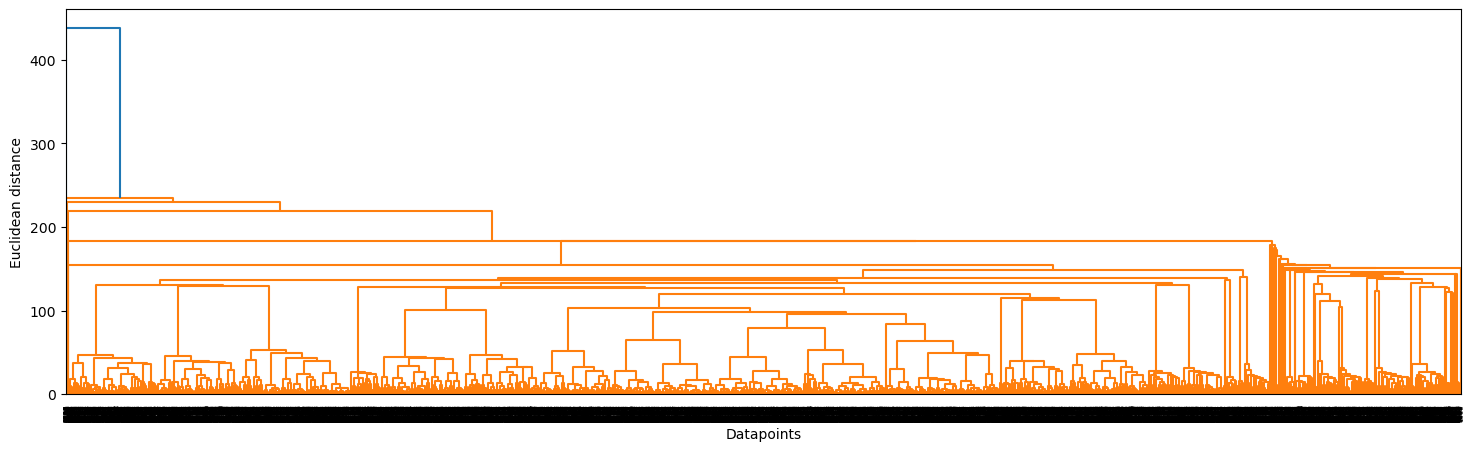

In [153]:
plt.figure(figsize=(18, 5))
merg = linkage(pca_df_subsample, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

    num_clusters  silhouette_score
0              2          0.970114
1              3          0.922044
2              4          0.845587
3              5          0.845833
4              6          0.846570
5              7          0.404174
6              8          0.401090
7              9          0.397524
8             10          0.393509
9             11          0.391409
10            12          0.389368
11            13          0.385476
12            14          0.381585
13            15          0.377221
14            16          0.372865
15            17          0.373563
16            18          0.371306
17            19          0.366881


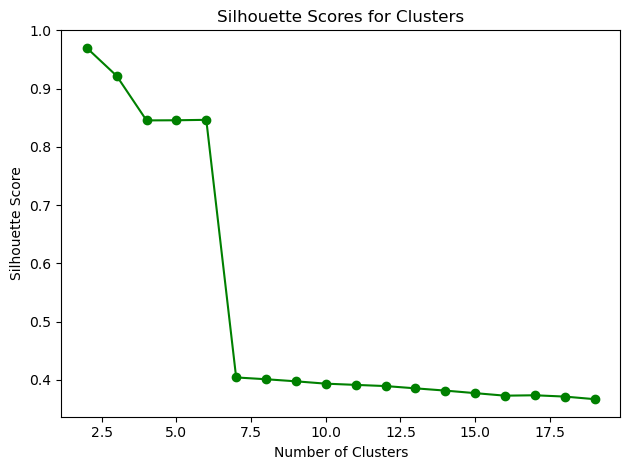

In [159]:
silhouette_scores = []
clusters_range = range(2, 20)

for K in clusters_range:
    hier = AgglomerativeClustering(n_clusters=K)
    hier = hier.fit(pca_df_subsample)
    labels = hier.fit_predict(pca_df_subsample)
    silhouette_scores.append(silhouette_score(pca_df_subsample, labels))

hier_cluster_df = pd.DataFrame({'num_clusters': clusters_range, 'silhouette_score': silhouette_scores})

print(hier_cluster_df)

# Silhouette Score Plot
plt.title('Silhouette Scores for Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.plot(hier_cluster_df['num_clusters'], hier_cluster_df['silhouette_score'], marker='o', color='g')

plt.tight_layout()
plt.show()

In [250]:
hie_cluster = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward',)
hie_cluster_model = hie_cluster.fit(pca_df_subsample)

In [252]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_, columns=['Labels'])

In [254]:
## joining the label dataframe with unscaled initial cleaned dataframe.(dfc)

df_hier = cleaned_df.join(df_label1)
df_hier.head()

,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,Labels
0,fit,34d,2260466,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0,0.0
1,fit,34b,153475,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0,0.0
2,fit,34b,1063761,135.0,10.0,party,hourglass,sheath,64.0,4,49.0,0.0
3,fit,34c,126335,135.0,8.0,formal affair,pear,dress,65.0,8,34.0,0.0
4,fit,34b,616682,145.0,10.0,wedding,athletic,gown,69.0,12,27.0,0.0


In [256]:
df_hier['Labels'].value_counts()

Labels
0.0    9983
1.0       8
2.0       5
5.0       2
3.0       1
4.0       1
Name: count, dtype: int64

## Conclusion

### 17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results. (2)

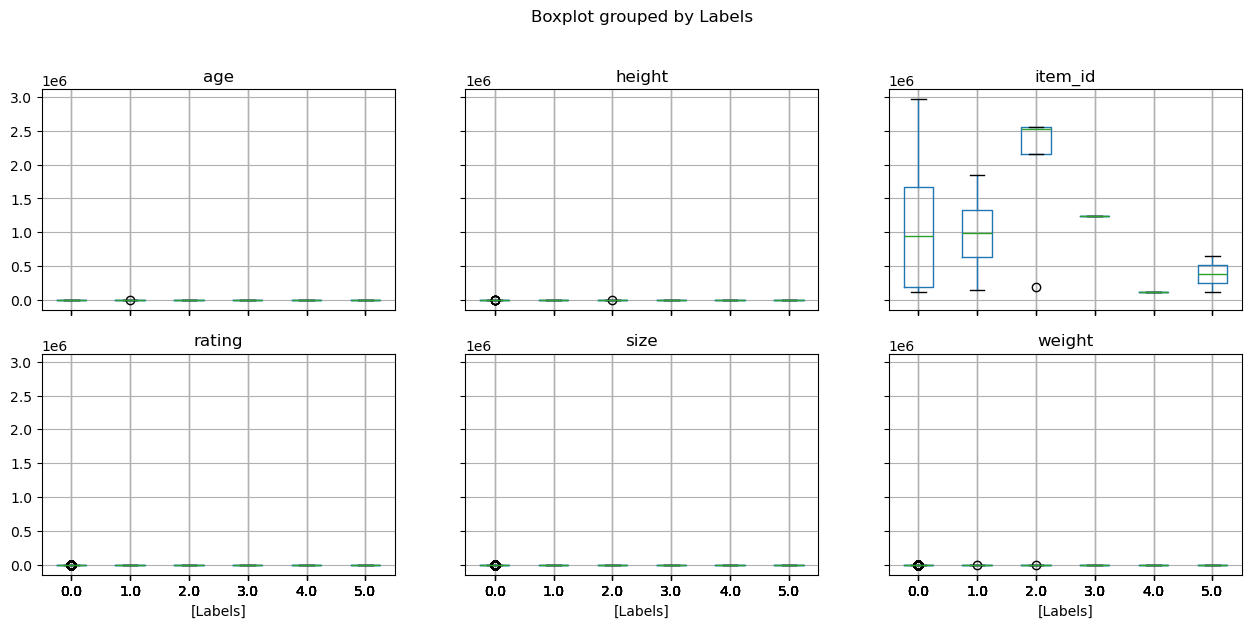

In [181]:
df_hier.boxplot(by ='Labels', layout = (3, 3), figsize = (15, 10))
plt.show()

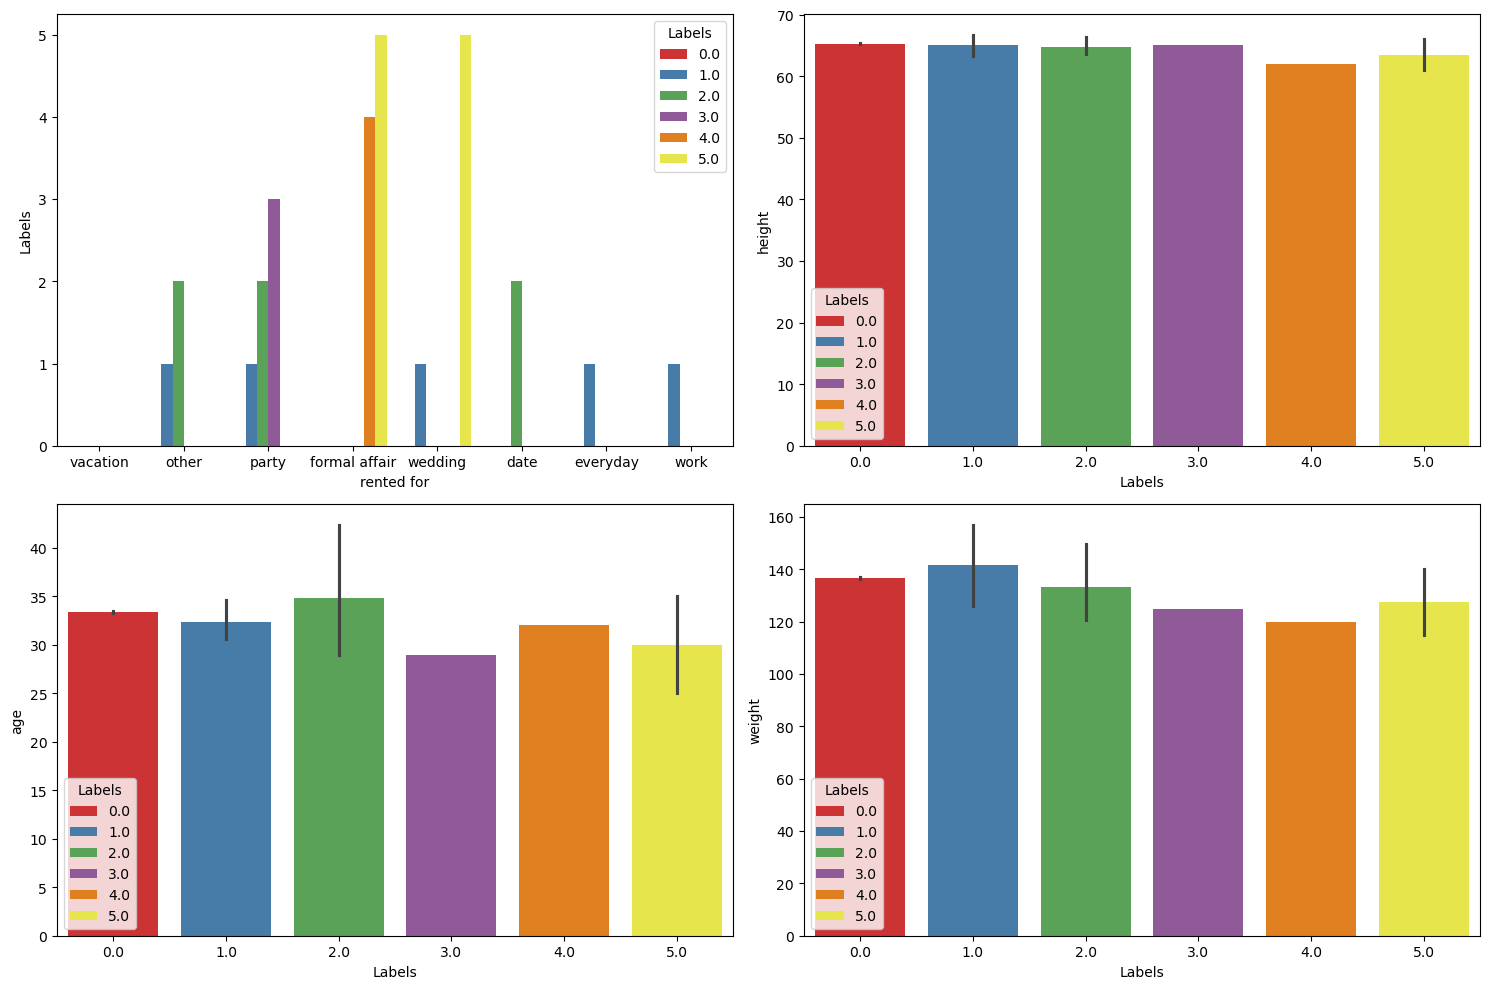

In [235]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.barplot(data = df_hier, y = 'Labels', x='rented for', hue='Labels', palette='Set1')

plt.subplot(2, 2, 2)
sns.barplot(data = df_hier, x = 'Labels', y='height', hue='Labels', palette='Set1')

plt.subplot(2, 2, 3)
sns.barplot(data = df_hier, x = 'Labels', y='age', hue='Labels', palette='Set1')

plt.subplot(2, 2, 4)
sns.barplot(data = df_hier, x = 'Labels', y='weight', hue='Labels', palette='Set1')

plt.tight_layout()
plt.show()

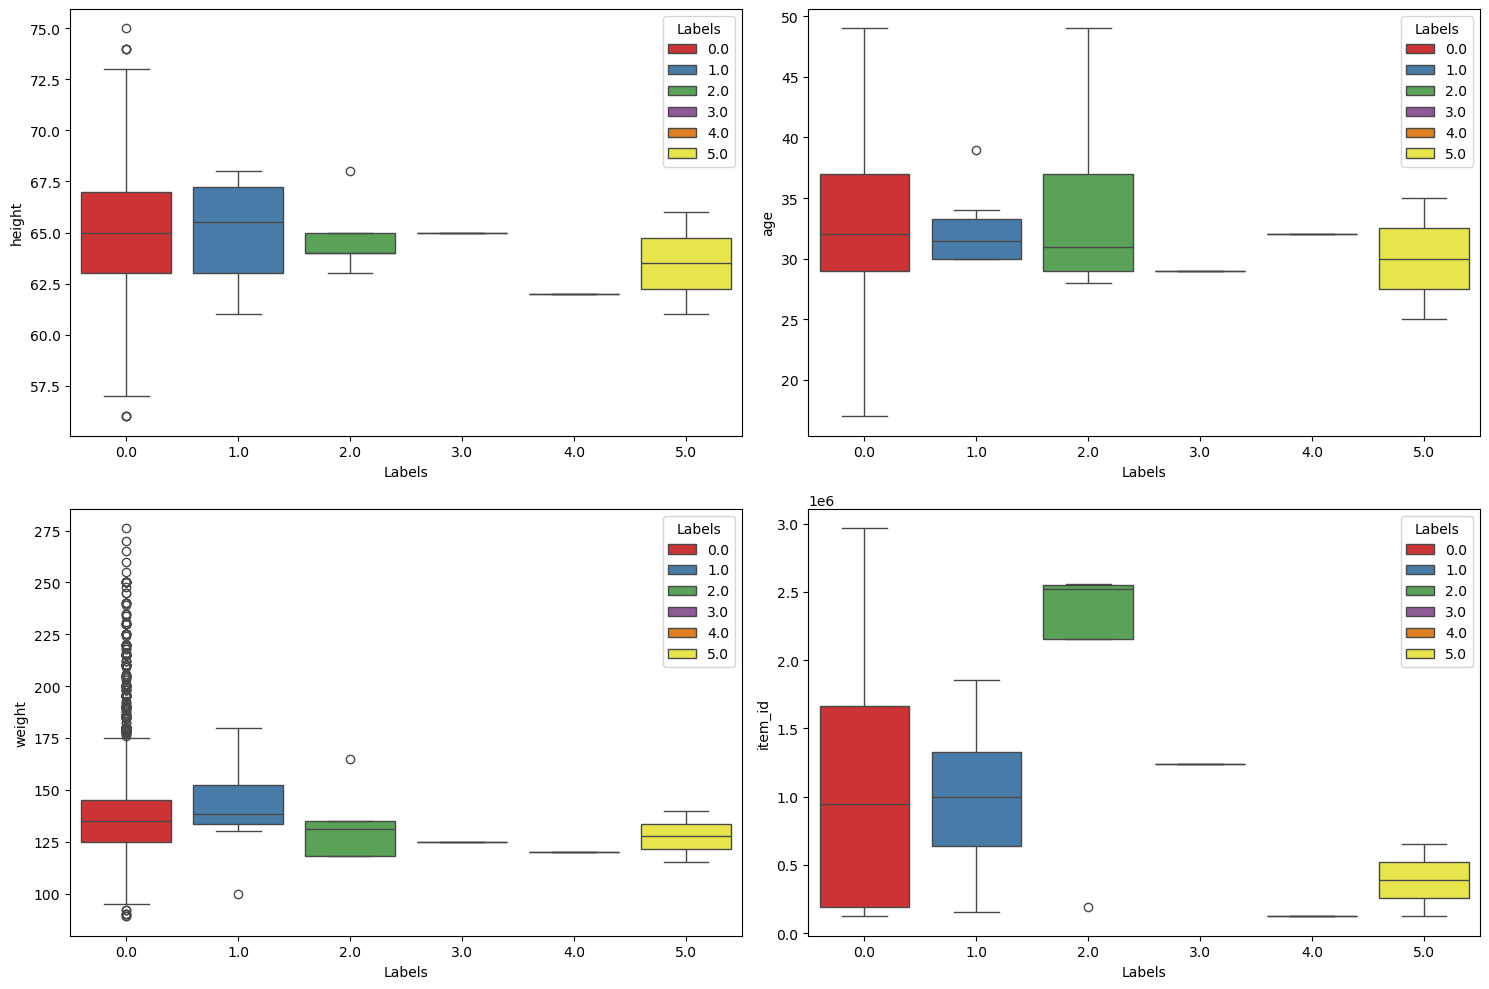

In [239]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data = df_hier, x = 'Labels', y='height', hue='Labels', palette='Set1')

plt.subplot(2, 2, 2)
sns.boxplot(data = df_hier, x = 'Labels', y='age', hue='Labels', palette='Set1')

plt.subplot(2, 2, 3)
sns.boxplot(data = df_hier, x = 'Labels', y='weight', hue='Labels', palette='Set1')

plt.subplot(2, 2, 4)
sns.boxplot(data = df_hier, x = 'Labels', y='item_id', hue='Labels', palette='Set1')

plt.tight_layout()
plt.show()

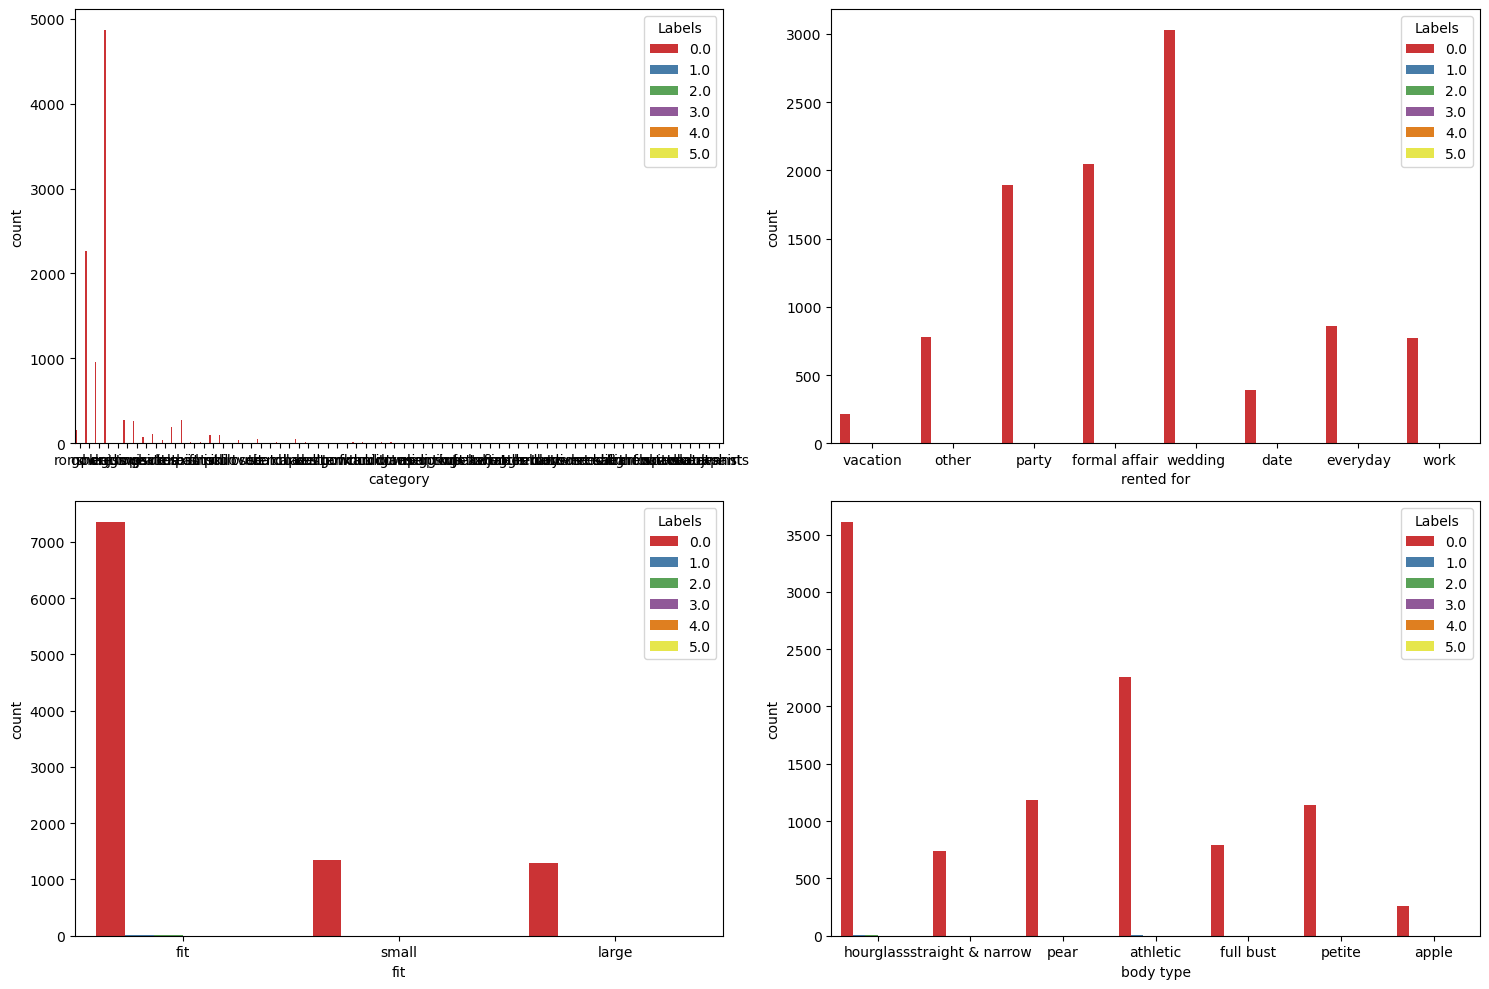

In [231]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(data = df_hier, x='category', hue='Labels', palette='Set1')

plt.subplot(2, 2, 2)
sns.countplot(data = df_hier, x='rented for', hue='Labels', palette='Set1')

plt.subplot(2, 2, 3)
sns.countplot(data = df_hier, x='fit', hue='Labels', palette='Set1')

plt.subplot(2, 2, 4)
sns.countplot(data = df_hier, x='body type', hue='Labels', palette='Set1')

plt.tight_layout()
plt.show()

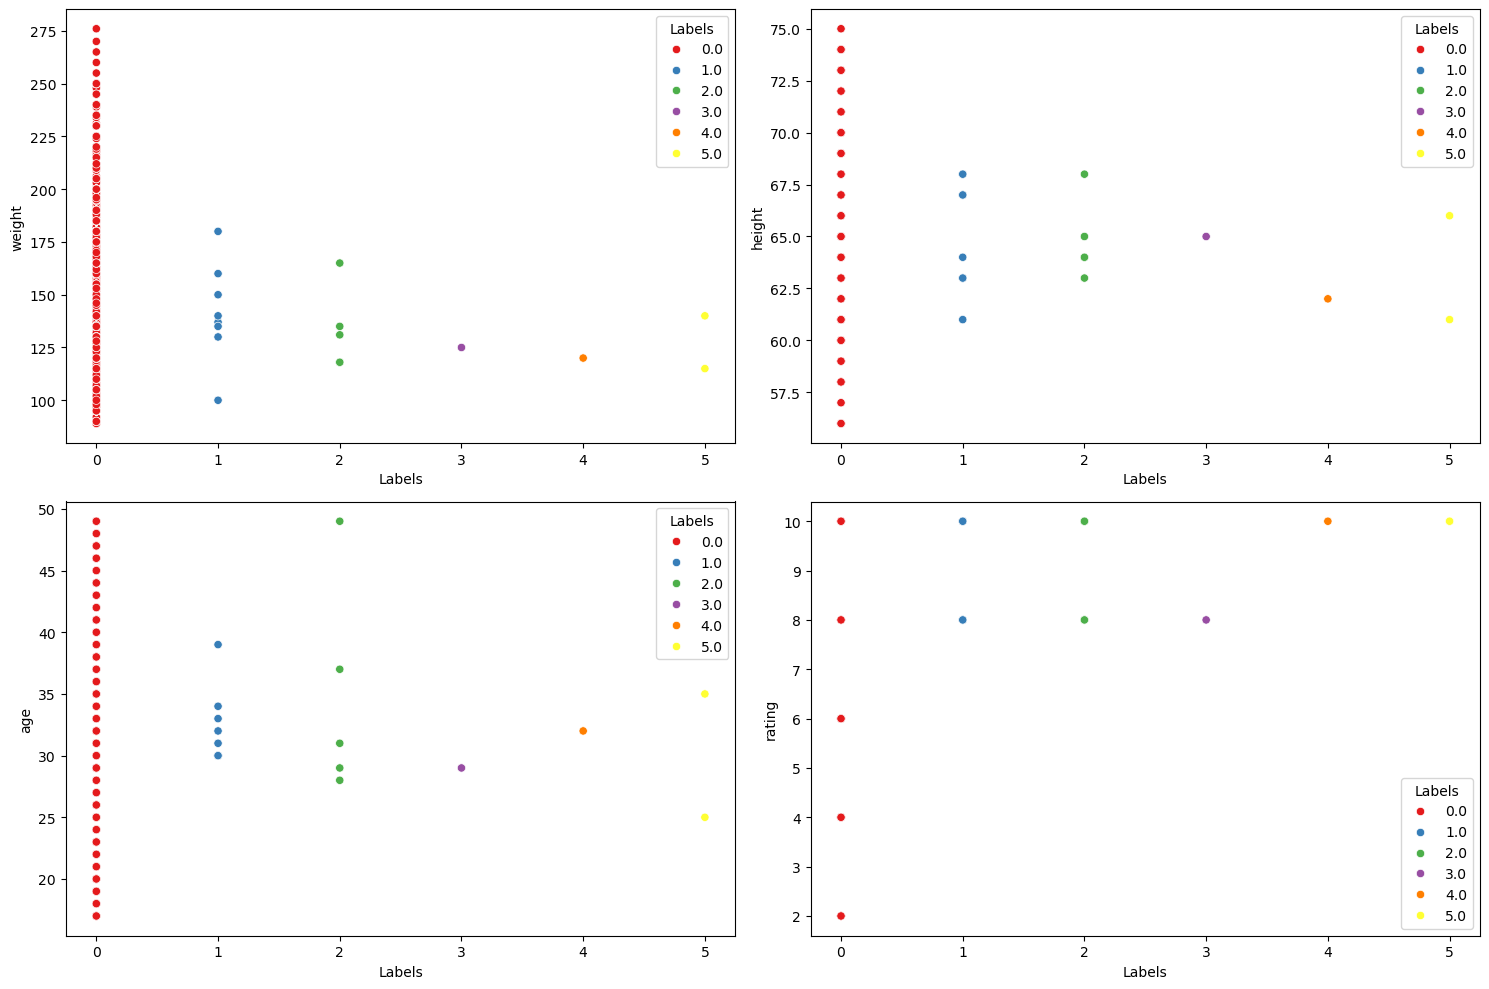

In [227]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(data = df_hier, y='weight', x = 'Labels', hue='Labels', palette='Set1')

plt.subplot(2, 2, 2)
sns.scatterplot(data = df_hier, y='height', x = 'Labels', hue='Labels', palette='Set1')

plt.subplot(2, 2, 3)
sns.scatterplot(data = df_hier, y='age', x = 'Labels', hue='Labels', palette='Set1')

plt.subplot(2, 2, 4)
sns.scatterplot(data = df_hier, y='rating', x = 'Labels', hue='Labels', palette='Set1')

plt.tight_layout()
plt.show()

#### Conclusion
- Cluster 0 :
    - Largest and most diverse cluster, representing the general population with younger age groups and the broadest range of rental products.
    - Suitable for generalized marketing and inventory strategies.
- Cluster 1 :
    - Distinct and focused group with taller, older, and heavier individuals.
    - Tailored strategies can target mid-range rental products.
- Cluster 2 :
    - Highly consistent group with older individuals and specific rental needs.
    - Represents customers with stable preferences for specific product categories.
- Clusters 3 and 4 :
    - Niche and highly specialized clusters with fixed data values.
    - Likely target unique use cases like events or specialized products.
- Cluster 5 :
    - Young and lighter demographic with narrow product preferences.
    - Targeted strategies for youth-focused rentals with smaller product ranges.

#### Key Recommendations
- Inventory Management:
    - Diversify inventory for Cluster 0.
    - Stock specialized products for Clusters 2, 3, and 4.
    - Offer youth-focused products for Cluster 5.
- Marketing Strategies:
    - Generalized campaigns for Cluster 0.
    - Tailored marketing for Clusters 1 and 2 based on age and product categories.
    - Niche campaigns for Clusters 3 and 4.
    - Focus on younger audiences with smaller, budget-friendly offerings for Cluster 5.
- Customer Insights:
    - Cluster 0: General population with broad rental habits.
    - Cluster 1 & 2: Distinct older demographics with specific needs.
    - Cluster 5: Young, lighter demographic with focused interests.
    - Clusters 3 & 4: Special, niche market segments